In [1]:
import math
import xarray as xr
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
level = np.linspace(0,50,6)
depth = 50 
time = np.linspace(0,364,365)
omg = (2*math.pi)/20
omg2 = (2*math.pi)/5
A2 = 1
A1 = 0.3*A2

u = np.full((int(len(time)),int(len(level))),np.nan)
u.shape

(365, 6)

In [3]:
level

array([ 0., 10., 20., 30., 40., 50.])

In [4]:
for t in range(len(time)): 
    for z in range(len(level)): 
        u[t,z] = A1*math.cos((math.pi/depth)*level[z])*math.cos(-omg*time[t]) + A2*math.cos((math.pi/depth)*level[z])*math.cos(-omg2*time[t])
        

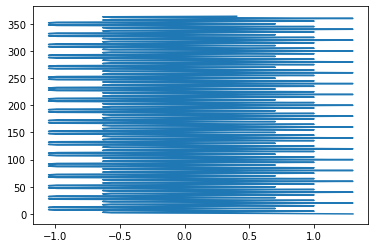

In [5]:
plt.plot(u[:,0],time)

In [6]:
u.shape

(365, 6)

In [7]:
cov = np.cov(u.T, bias=True) # uten .T ble den en 73x73 matrise 
values, vectors = np.linalg.eig(cov)
print('values: ', values) 
print('------------------------------------------------------')    
print('values[0]: ', values[0])
print('------------------------------------------------------') 
print('vectors: ', vectors) 
print('------------------------------------------------------')
print('vectors[0]: ', vectors[0]) 

order = values.argsort()[::-1]
values_, vectors_ = values[order], vectors[:, order]

print('-----------------------------------------------------------')
print('-----------------------------------------------------------')

print(cov.shape) 
print('cov :', cov)
print('------------------------------------------------------')    
print('values: ',values_) 
print('------------------------------------------------------')    
print('values[0]: ',values_[0]) 
print('------------------------------------------------------')    
print('vectors: ',vectors_) 
print('------------------------------------------------------') 
print('vectors[0]: ',vectors_[0]) 

values:  [ 1.90939202e+00 -9.48361191e-16 -1.00903741e-17  7.97687037e-17
  1.79829938e-17 -2.10954247e-18]
------------------------------------------------------
values[0]:  1.9093920236343531
------------------------------------------------------
vectors:  [[-0.53452248  0.46658371  0.69337194 -0.00432018  0.00888919 -0.00572109]
 [-0.43243777 -0.53397147  0.0382508   0.51400117  0.06649515  0.33173198]
 [-0.16517653 -0.15619032 -0.01814714 -0.00204121  0.5385377  -0.71868608]
 [ 0.16517653  0.13147942  0.03509192 -0.50435539  0.83959434  0.59779949]
 [ 0.43243777  0.49711312 -0.01297344  0.69381272 -0.01397029 -0.11639461]
 [ 0.53452248 -0.45647608  0.71836144  0.00543284 -0.01904451 -0.04999548]]
------------------------------------------------------
vectors[0]:  [-0.53452248  0.46658371  0.69337194 -0.00432018  0.00888919 -0.00572109]
-----------------------------------------------------------
-----------------------------------------------------------
(6, 6)
cov : [[ 0.54554058  

In [8]:
print(values[0])
print('---------------------')
print(values_[0])

1.9093920236343531
---------------------
1.9093920236343531


In [9]:
print(values)
print('---------------------')
print(values_)

[ 1.90939202e+00 -9.48361191e-16 -1.00903741e-17  7.97687037e-17
  1.79829938e-17 -2.10954247e-18]
---------------------
[ 1.90939202e+00  7.97687037e-17  1.79829938e-17 -2.10954247e-18
 -1.00903741e-17 -9.48361191e-16]


In [10]:
print(vectors[0])
print('---------------------')
print(vectors_[0])

[-0.53452248  0.46658371  0.69337194 -0.00432018  0.00888919 -0.00572109]
---------------------
[-0.53452248 -0.00432018  0.00888919 -0.00572109  0.69337194  0.46658371]


In [11]:
print(vectors)
print('---------------------')
print(vectors_)

[[-0.53452248  0.46658371  0.69337194 -0.00432018  0.00888919 -0.00572109]
 [-0.43243777 -0.53397147  0.0382508   0.51400117  0.06649515  0.33173198]
 [-0.16517653 -0.15619032 -0.01814714 -0.00204121  0.5385377  -0.71868608]
 [ 0.16517653  0.13147942  0.03509192 -0.50435539  0.83959434  0.59779949]
 [ 0.43243777  0.49711312 -0.01297344  0.69381272 -0.01397029 -0.11639461]
 [ 0.53452248 -0.45647608  0.71836144  0.00543284 -0.01904451 -0.04999548]]
---------------------
[[-0.53452248 -0.00432018  0.00888919 -0.00572109  0.69337194  0.46658371]
 [-0.43243777  0.51400117  0.06649515  0.33173198  0.0382508  -0.53397147]
 [-0.16517653 -0.00204121  0.5385377  -0.71868608 -0.01814714 -0.15619032]
 [ 0.16517653 -0.50435539  0.83959434  0.59779949  0.03509192  0.13147942]
 [ 0.43243777  0.69381272 -0.01397029 -0.11639461 -0.01297344  0.49711312]
 [ 0.53452248  0.00543284 -0.01904451 -0.04999548  0.71836144 -0.45647608]]


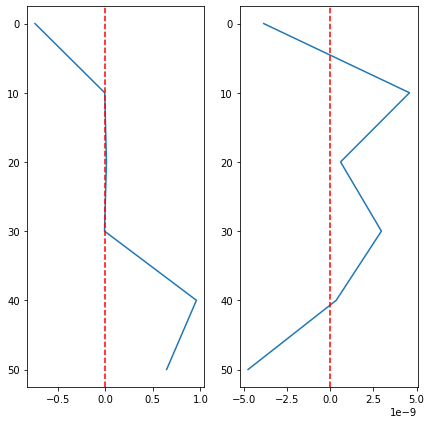

In [12]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (7,7))

ax1.plot(vectors_[0]*np.sqrt(values_[0]),level)
ax1.axvline(0, color='r', linestyle = '--')
ax1.invert_yaxis()

ax2.plot(vectors_[1]*np.sqrt(values_[1]),level)
ax2.axvline(0, color='r', linestyle = '--')
ax2.invert_yaxis()

In [13]:
cov = np.cov(u.T, bias=True) # uten .T ble den en 73x73 matrise 
values, vectors = np.linalg.eig(cov)
order = values.argsort()[::-1]
values_, vectors_ = values[order], vectors[order,:]

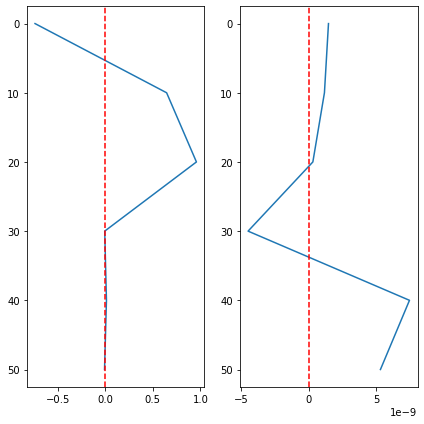

In [14]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (7,7))

ax1.plot(vectors_[0]*np.sqrt(values_[0]),level)
ax1.axvline(0, color='r', linestyle = '--')
ax1.invert_yaxis()

ax2.plot(vectors_[1]*np.sqrt(values_[1]),level)
ax2.axvline(0, color='r', linestyle = '--')
ax2.invert_yaxis()

In [15]:
print(values[0])
print('---------------------')
print(values_[0])

1.9093920236343531
---------------------
1.9093920236343531


In [16]:
print(vectors[0])
print('---------------------')
print(vectors_[0])

[-0.53452248  0.46658371  0.69337194 -0.00432018  0.00888919 -0.00572109]
---------------------
[-0.53452248  0.46658371  0.69337194 -0.00432018  0.00888919 -0.00572109]
